<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow/4-training-models/04_logistic_softnax_regression_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Logistic/Softnax Regression Fundamentals

Logistic Regression (also called Logit Regression) is commonly
used to estimate the probability that an instance belongs to a particular class (e.g.,
what is the probability that this email is spam?). 

If the estimated probability is greater
than 50%, then the model predicts that the instance belongs to that class (called the
positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to
the negative class, labeled “0”). 

This makes it a binary classifier.

##Setup

In [8]:
# Common imports
import numpy as np
import numpy.random as rnd
import os

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn import datasets


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

##Estimating Probabilities

Just like a Linear Regression model, a Logistic
Regression model computes a weighted sum of the input features (plus a bias term),
but instead of outputting the result directly like the Linear Regression model does, it
outputs the logistic of this result

$
\hat{p} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \sigma(\boldsymbol{\theta}^T \mathbf{x})
$

The logistic—noted $\sigma(·)$—is a sigmoid function (i.e., S-shaped) that outputs a number
between 0 and 1.

$
\sigma(t) = \dfrac{1}{1 + \exp(-t)}
$

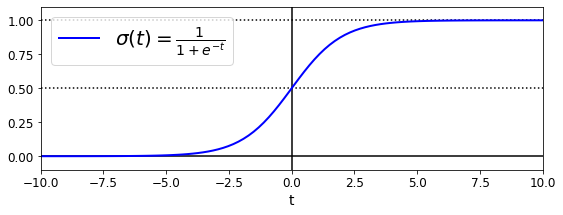

In [3]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

Once the Logistic Regression model has estimated the probability $\hat p = h_\theta(x)$ that an
instance $x$ belongs to the positive class, it can make its prediction $\hat y$ easily.

$
\hat{y} =
\begin{cases}
  0 & \text{if } \hat{p} < 0.5, \\
  1 & \text{if } \hat{p} \geq 0.5.
\end{cases}
$

Notice that $\sigma(t) < 0.5$ when $t < 0$, and $\sigma(t) ≥ 0.5$ when $t ≥ 0$, so a Logistic Regression
model predicts 1 if $x^⊺ \theta$ is positive and $0$ if it is negative.

The score $t$ is often called the logit. The name comes from the fact
that the logit function, defined as $logit(p) = log(\frac{p}{1 – p})$, is the
inverse of the logistic function. 

Indeed, if you compute the logit of
the estimated probability $p$, you will find that the result is $t$. The
logit is also called the `log-odds`, since it is the log of the ratio
between the estimated probability for the positive class and the
estimated probability for the negative class.

##Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that
contains the sepal and petal length and width of 150 iris flowers of three different
species: Iris setosa, Iris versicolor, and Iris virginica.

<img src='https://github.com/rahiakela/machine-learning-research-and-practice/blob/main/hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow/4-training-models/images/1.png?raw=1' width='600'/>

Let’s try to build a classifier to detect the Iris virginica type based only on the petal
width feature.

In [5]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [6]:
iris["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)   # 1 if Iris virginica, else 0

Now let’s train a Logistic Regression model:

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Let’s look at the model’s estimated probabilities for flowers with petal widths varying
from 0 cm to 3 cm.

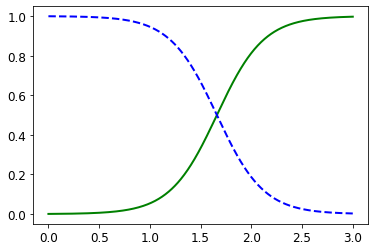

In [10]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


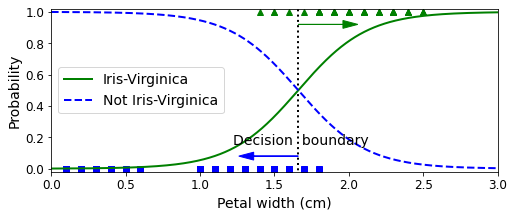

In [11]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

So, what is its decision boundary?

In [13]:
decision_boundary

array([1.66066066])

However, if you ask it to
predict the class (using the `predict()` method rather than the `predict_proba()` method), it will return whichever class is the most likely.

In [12]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Let's train it again but this time displaying two features: petal width
and length. Once trained, the Logistic Regression classifier can, based on these two
features, estimate the probability that a new flower is an Iris virginica. 

The dashed line
represents the points where the model estimates a 50% probability: this is the model’s
decision boundary. Note that it is a linear boundary.

Each parallel line represents the
points where the model outputs a specific probability, from 15% (bottom left) to 90%
(top right). All the flowers beyond the top-right line have an over 90% chance of
being Iris virginica, according to the model.

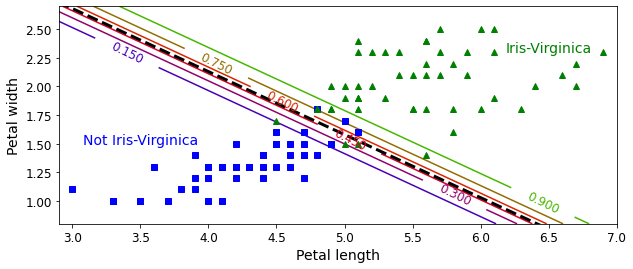

In [14]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

##Softmax Regression